<a href="https://colab.research.google.com/github/saishshinde15/NLP/blob/main/Spam_filtering_CountVectorization_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [5]:
nltk.download("wordnet")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [7]:
dataset=pd.read_csv('spam (1).csv')

In [8]:
dataset

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


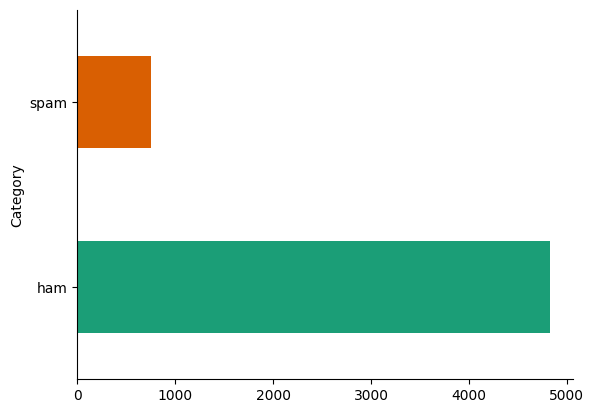

In [10]:
# @title Category

from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [11]:
dataset.isnull().sum()

Category    0
Message     0
dtype: int64

In [12]:
dataset

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
X=dataset['Message']

In [15]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [16]:
y=dataset['Category']

In [17]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object

In [18]:
X_train_input,X_test_input,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [19]:
len(X_train_input)

4457

In [20]:
len(y_train)

4457

In [21]:
vectorizer=CountVectorizer(analyzer='word')

In [22]:
X_train=vectorizer.fit_transform(X_train_input)
X_test=vectorizer.transform(X_test_input)

In [23]:
from sklearn.naive_bayes import MultinomialNB

In [24]:
nb1=MultinomialNB()

In [25]:
nb1.fit(X_train,y_train)

MultinomialNB()

In [26]:
model_nb1_test=nb1.score(X_test,y_test)

In [27]:
model_nb1_train=nb1.score(X_train,y_train)

In [28]:
model_result=(['model 1',model_nb1_test,model_nb1_train])

In [29]:
model_result

['model 1', 0.9856502242152466, 0.9934933811981154]

In [30]:
y_pred=nb1.predict(X_test)

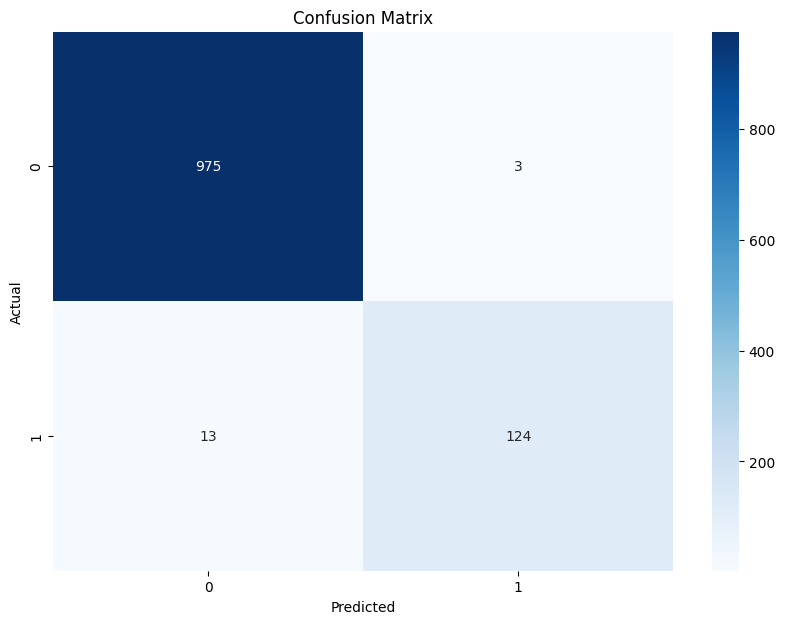

In [32]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Much better to understand


In [34]:
cm = confusion_matrix(y_test ,y_pred)
cm

array([[975,   3],
       [ 13, 124]])

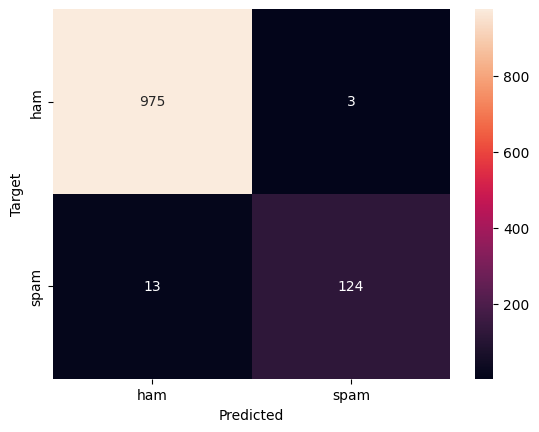

In [37]:
def plot_cm(cm):
  classes = ['ham', 'spam']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

In [38]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)
## Precision is important in the context of Spam Filtering

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       978
        spam       0.98      0.91      0.94       137

    accuracy                           0.99      1115
   macro avg       0.98      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



### Lemmitization

In [47]:
def get_wordnet_pos(treebank_tag):
  if treebank_tag.startswith('J'):
    return wordnet.ADJ
  elif treebank_tag.startswith('V'):
    return wordnet.VERB
  elif treebank_tag.startswith('N'):
    return wordnet.NOUN
  elif treebank_tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

In [48]:
class LemmaTokenizer:
  def __init__(self):
    self.wnl = WordNetLemmatizer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    words_and_tags = nltk.pos_tag(tokens)
    return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) \
            for word, tag in words_and_tags]

In [49]:
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())

In [50]:
X_train=vectorizer.fit_transform(X_train_input)
X_test=vectorizer.transform(X_test_input)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [52]:
from sklearn.naive_bayes import MultinomialNB
nb2=MultinomialNB()

In [53]:
nb2.fit(X_train,y_train)

MultinomialNB()

In [54]:
model_nb2_test=nb2.score(X_test,y_test)

In [55]:
model_nb2_train=nb2.score(X_train,y_train)

In [56]:
model_result=(['model 1',model_nb1_test,model_nb1_train],
              ['model 2',model_nb2_test,model_nb2_train])

In [57]:
model_result

(['model 1', 0.9856502242152466, 0.9934933811981154],
 ['model 2', 0.9865470852017937, 0.991249719542293])

In [60]:
y_pred2=nb2.predict(X_test)

In [61]:
cm = confusion_matrix(y_test ,y_pred2)
cm

array([[976,   2],
       [ 13, 124]])

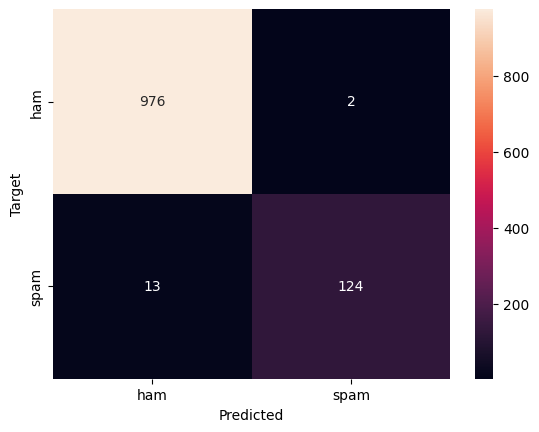

In [62]:
def plot_cm(cm):
  classes = ['ham', 'spam']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

In [63]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred2)
print(cr)
## Precision is important in the context of Spam Filtering

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       978
        spam       0.98      0.91      0.94       137

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



AOC/ROC Curve

In [75]:
from sklearn.metrics import roc_auc_score
Prob_train = nb1.predict_proba(X_train)[:,1]
Prob_test = nb1.predict_proba(X_test)[:,1]
print("train AUC:", roc_auc_score(y_train, Prob_train))
print("test AUC:", roc_auc_score(y_test, Prob_test))

train AUC: 0.9898639348523651
test AUC: 0.9702282328004419


In [76]:
from sklearn.metrics import roc_auc_score
Prob_train = nb2.predict_proba(X_train)[:,1]
Prob_test = nb2.predict_proba(X_test)[:,1]
print("train AUC:", roc_auc_score(y_train, Prob_train))
print("test AUC:", roc_auc_score(y_test, Prob_test))

train AUC: 0.9898639348523651
test AUC: 0.9702282328004419


### logistic Reg

In [79]:
vectorizer=CountVectorizer(analyzer='word')

In [80]:
X_train=vectorizer.fit_transform(X_train_input)
X_test=vectorizer.transform(X_test_input)

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
lr=LogisticRegression()

In [83]:
lr.fit(X_train,y_train)

LogisticRegression()

In [84]:
model1_lr=lr.score(X_test,y_test)

In [85]:
model1_lr_train=lr.score(X_train,y_train)

In [88]:
model_result=(['model 1',model_nb1_test,model_nb1_train],
              ['model 2',model_nb2_test,model_nb2_train],
              ['model lr1',model1_lr,model1_lr_train])

In [89]:
model_result

(['model 1', 0.9856502242152466, 0.9934933811981154],
 ['model 2', 0.9865470852017937, 0.991249719542293],
 ['model lr1', 0.9838565022421525, 0.9968588736818488])

In [90]:
y_lr=lr.predict(X_test)

In [93]:
cm = confusion_matrix(y_test ,y_lr)
cm

array([[974,   4],
       [ 14, 123]])

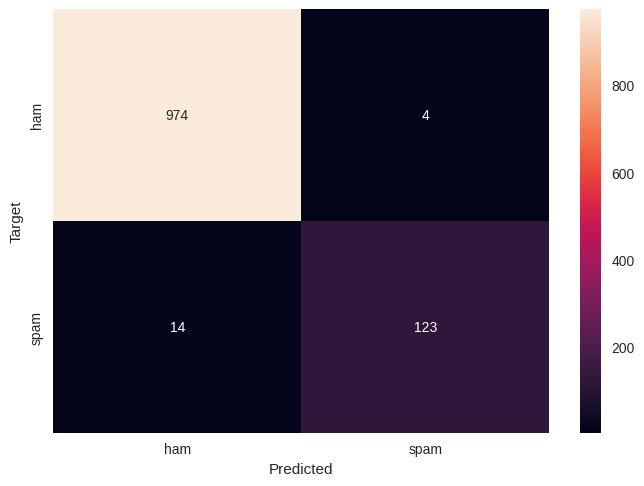

In [94]:
def plot_cm(cm):
  classes = ['ham', 'spam']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

In [95]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_lr)
print(cr)

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       978
        spam       0.97      0.90      0.93       137

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



### Lemitization

In [96]:
def get_wordnet_pos(treebank_tag):
  if treebank_tag.startswith('J'):
    return wordnet.ADJ
  elif treebank_tag.startswith('V'):
    return wordnet.VERB
  elif treebank_tag.startswith('N'):
    return wordnet.NOUN
  elif treebank_tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

In [97]:
class LemmaTokenizer:
  def __init__(self):
    self.wnl = WordNetLemmatizer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    words_and_tags = nltk.pos_tag(tokens)
    return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) \
            for word, tag in words_and_tags]

In [98]:
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())

In [99]:
X_train=vectorizer.fit_transform(X_train_input)
X_test=vectorizer.transform(X_test_input)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
lr1=LogisticRegression()

In [102]:
lr1.fit(X_train,y_train)

LogisticRegression()

In [103]:
model2_lr=lr1.score(X_test,y_test)

In [104]:
model2_lr_train=lr1.score(X_train,y_train)

In [105]:
model_result=(['model 1',model_nb1_test,model_nb1_train],
              ['model 2',model_nb2_test,model_nb2_train],
              ['model lr1',model1_lr,model1_lr_train],
              ['model lr2',model2_lr,model2_lr_train])

In [106]:
model_result

(['model 1', 0.9856502242152466, 0.9934933811981154],
 ['model 2', 0.9865470852017937, 0.991249719542293],
 ['model lr1', 0.9838565022421525, 0.9968588736818488],
 ['model lr2', 0.9820627802690582, 0.9959614090195199])

In [107]:
y_lr1=lr1.predict(X_test)

In [108]:
cm = confusion_matrix(y_test ,y_lr1)
cm

array([[974,   4],
       [ 16, 121]])

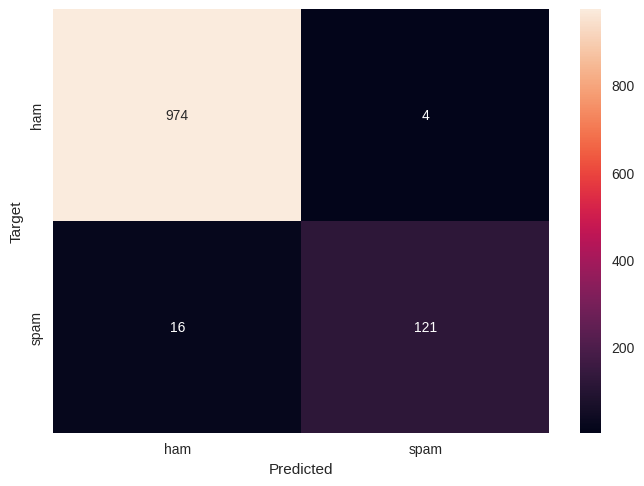

In [109]:
def plot_cm(cm):
  classes = ['ham', 'spam']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

In [110]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_lr1)
print(cr)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       978
        spam       0.97      0.88      0.92       137

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

